In [1]:
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

C:\Users\pactera\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


11493376/11490434 [==============================] - 1332s 116us/step


In [42]:
print(type(X_train),X_train.shape)

<class 'numpy.ndarray'> (60000, 28, 28)


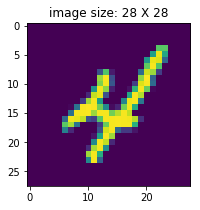

In [43]:
#visualize the data
img1 = X_train[9]
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(3,3))
plt.imshow(img1)
plt.title('image size: 28 X 28')
plt.show()

In [44]:
feature_size=img1.shape[0]*img1.shape[0]
X_train_form=X_train.reshape(X_train.shape[0],feature_size)
X_test_form=X_test.reshape(X_test.shape[0],feature_size)
print(X_train_form.shape)
print(X_test_form.shape)

(60000, 784)
(10000, 784)


In [45]:
y_train[0]

5

In [46]:
X_train_normal = X_train_form/255
X_test_normal = X_test_form/255
# print(X_train_normal[0])

from keras.utils import to_categorical
y_train_form=to_categorical(y_train)
# y_train_form[0]
y_test_form=to_categorical(y_test)

In [47]:
#建模
from keras.models import Sequential
from keras.layers import Dense,Activation

mlp=Sequential()
mlp.add(Dense(units=392,activation='relu',input_dim=784))
mlp.add(Dense(units=392,activation='relu'))
mlp.add(Dense(units=10,activation='softmax'))
mlp.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 392)               307720    
_________________________________________________________________
dense_11 (Dense)             (None, 392)               154056    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                3930      
Total params: 465,706
Trainable params: 465,706
Non-trainable params: 0
_________________________________________________________________


In [48]:
print((784+1)*392)
print((392+1)*392)
print((392+1)*10)

307720
154056
3930


In [49]:
mlp.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['categorical_accuracy'])

In [50]:
mlp.fit(X_train_normal,y_train_form,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 18s 293us/step - loss: 0.1905 - categorical_accuracy: 0.9417
Epoch 2/5
60000/60000 [==============================] - 17s 281us/step - loss: 0.0819 - categorical_accuracy: 0.9749
Epoch 3/5
60000/60000 [==============================] - 18s 306us/step - loss: 0.0560 - categorical_accuracy: 0.9827
Epoch 4/5
60000/60000 [==============================] - 18s 297us/step - loss: 0.0411 - categorical_accuracy: 0.9862
Epoch 5/5
60000/60000 [==============================] - 19s 310us/step - loss: 0.0337 - categorical_accuracy: 0.9896


In [51]:
y_train_pred=mlp.predict_classes(X_train_normal)
print(y_train_pred[0:9])

[5 0 4 1 9 2 1 3 1]


In [55]:
y_test_predict = mlp.predict_classes(X_test_normal)
accuracy_test = accuracy_score(y_test,y_test_predict)
print(accuracy_test)

0.9803


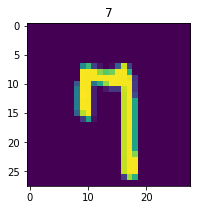

In [59]:
img2 = X_test[80]
fig2 = plt.figure(figsize=(3,3))
plt.imshow(img2)
plt.title(y_test_predict[80])
plt.show()